# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**




### **Importante**

A continuación indico cuales son las tareas que he realizado en el proyecto.

Tareas realizadas:
* Análisis de los datos
* Preparación y limpieza de datos
* Creación de Stopwords
* Separación dataset entre Reviews Positivas y Negativas
* Análisis Reviews Positivas y Negativas
* Wordcloud Reviews Positivas y Negativas
* Frecuencia palabras Reviews Positivas y Negativas
* Normalización dataset
* Vectorización dataset
* Generación Modelo Benchmark
* Análisis modelo Estrella vs Opiniones(negativas/positivas)
* Generación modelos RandomForest, SVM y Naive Bayes
* Optimización de hiperparámetros
* Conclusiones


**Anexo I**

Utilizo la librería Spacy con los mejores modelos obtenidos anteriormente.Lo que busco en este apartado es verificar si esta librería me va a ayudar a mejorar las métricas de los diferentes modelos.

**Anexo II**

Utilizo el dataset completo para validar si al contar con más datoso datos diferentes mejora mi modelo.

**Anexo III**

Aqui realizo diferentes validaciones para identificar si existen diferencias entre utilizar o no las stopwords y tambien si el uso de cambiar la cantidad de letras por palabra aumenta las métricas.

**Anexo IV**

En este apartado verifico cuales son el conjunto de palabras que más se utilizan para validar los modelos.


In [1]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import itertools
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/dlcastan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dlcastan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Para correr desde Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargo datos desde Drive
#data = pd.read_json("/content/drive/MyDrive/Personal/Cursos/Acamica/Proyecto 3/dataset_es_dev.json", lines = True)
#data.head()

In [6]:
#Cargo datos desde archivo
data = pd.read_json("dataset_es_dev.json", lines = True)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


## Analizo los datos del Dataset

In [7]:
#Veo la info de mi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


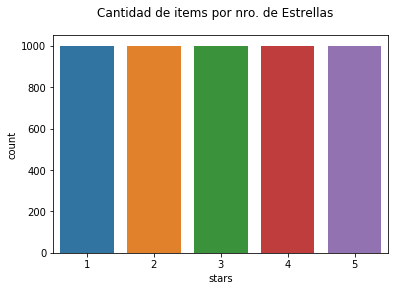

In [8]:
#Veo cantidad de review por estrellas
sns.countplot(x="stars", data=data)
plt.suptitle('Cantidad de items por nro. de Estrellas')
plt.show()

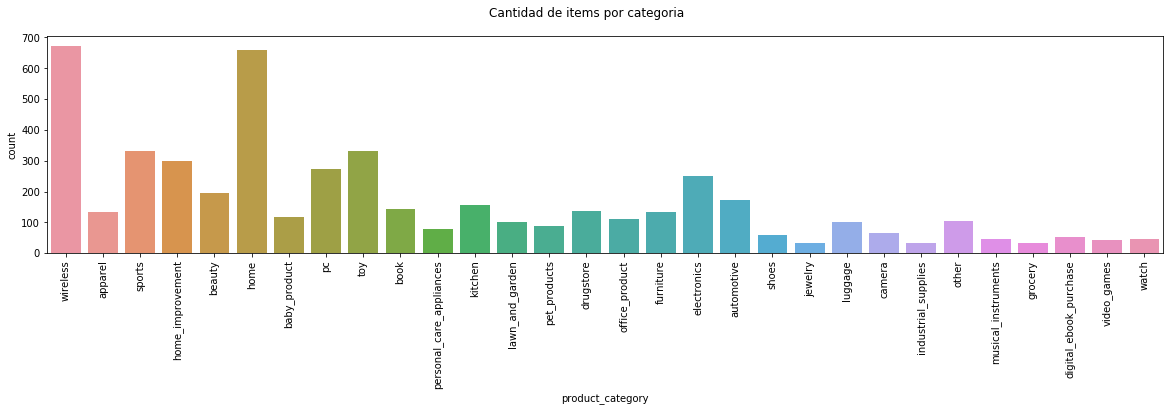

In [9]:
# Veo cantidad de productos por categoría
plt.figure(figsize = (20,4))
plt.suptitle('Cantidad de items por categoria')
sns.countplot(x="product_category", data=data)
plt.xticks(rotation=90)
plt.show()

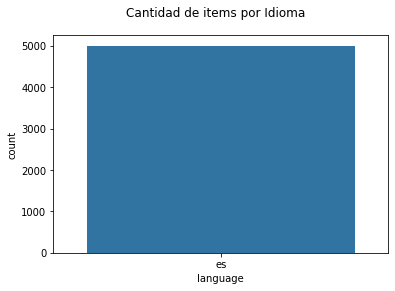

In [10]:
# Veo idioma del dataset
sns.countplot(x="language", data=data)
plt.suptitle('Cantidad de items por Idioma')
plt.show()

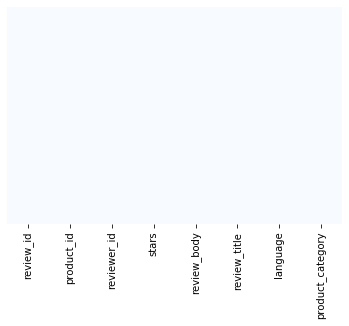

In [11]:
#Controlo datos faltantes
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [12]:
# Verifico valores faltantes por cada columna del dataset
data.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

## Preparación y limpieza de datos

In [13]:
#Importo las librerías que voy a necesitar
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [14]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dlcastan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dlcastan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Creo Stopwords

In [15]:
# Cargo las Stopwords para el idioma español
from nltk.corpus import stopwords
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [16]:
# Creo lista con palabras que quiero sacar
my_stopwords = ['a','ella','mismos','solo', 'acá','ellas','modo','somos', 'ahí','ello','mucha','soy',
      'ajena','ellos','muchas','sr', 'ajenas','empleais','muchísima','sra', 'ajeno','emplean',
      'muchísimas','sres', 'ajenos','emplear','muchísimo','sta', 'al','empleas','muchísimos','su',
      'algo','empleo','mucho','sus', 'algún','en','muchos','suya', 'alguna','encima','muy','suyas',
      'algunas','entonces','nada','suyo', 'alguno','entre','ni','suyos', 'algunos','era','ningun','tal',
      'allá','eramos','ninguna','tales', 'alli','eran','ningunas','también', 'allí','eras','ninguno','tambien',
      'ambos','eres','ningunos','tampoco', 'ampleamos','es','no','tan', 'ante','esa','nos','tanta',
      'antes','esas','nosotras','tantas', 'aquel','ese','nosotros','tanto', 'aquella','eso','nuestra','tantos',
      'aquellas','esos','nuestras','te', 'aquello','esta','nuestro','teneis', 'aquellos','estaba','nuestros','tenemos',
      'aqui','estado','nunca','tener', 'aquí','estais','os','tengo', 'arriba','estamos','otra','ti',
      'asi','estan','otras','tiempo', 'atras','estar','otro','tiene', 'aun','estas','otros','tienen',
      'aunque','este','para','toda', 'bajo','esto','parecer','todas', 'bastante','estos','pero','todo',
      'bien','estoy','poca','todos', 'cabe','etc','pocas','tomar', 'cada','fin','poco','trabaja',
      'casi','fue','pocos','trabajais', 'cierta','fueron','podeis','trabajamos', 'ciertas','fui','podemos','trabajan',
      'cierto','fuimos','poder','trabajar', 'ciertos','gueno','podria','trabajas', 'como','ha','podriais','trabajo',
      'cómo','hace','podriamos','tras', 'con','haceis','podrian','tú', 'conmigo','hacemos','podrias','tu',
      'conseguimos','hacen','por','tus', 'conseguir','hacer','por qué','tuya', 'consigo','haces','porque','tuyo',
      'consigue','hacia','primero','tuyos', 'consiguen','hago','primero desde','ultimo',
      'consigues','hasta','puede','un', 'contigo','incluso','pueden','una', 'contra','intenta','puedo','unas',
      'cual','intentais','pues','uno', 'cuales','intentamos','que','unos', 'cualquier','intentan','qué','usa',
      'cualquiera','intentar','querer','usais', 'cualquieras','intentas','quien','usamos',
      'cuan','intento','quién','usan', 'cuán','ir','quienes','usar', 'cuando','jamás','quienesquiera','usas',
      'cuanta','junto','quienquiera','uso', 'cuánta','juntos','quiza','usted','cuantas','la','quizas','ustedes',
      'cuántas','largo','sabe','va', 'cuanto','las','sabeis','vais', 'cuánto','lo','sabemos','valor',
      'cuantos','los','saben','vamos', 'cuántos','mas','saber','van', 'de','más','sabes','varias',
      'dejar','me','se','varios', 'del','menos','segun','vaya', 'demás','mi','ser','verdad',
      'demas','mía','si','verdadera', 'demasiada','mia','sí','vosotras', 'demasiadas','mias','siempre','vosotros',
      'demasiado','mientras','siendo','voy', 'demasiados','mio','sin','vuestra', 'dentro','mío','sín','vuestras',
      'desde','mios','sino','vuestro', 'donde','mis','so','vuestros', 'dos','misma','sobre','y', 'el','mismas','sois','ya',
      'él','mismo','solamente','yo', 'muy', 'el', 'con', 'son', 'un', 'de', 'clase', 'curso', 'del', 'e']

In [17]:
# Sumo palabras al stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
for i in my_stopwords:
    stopwords.append(i)
print(stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [18]:
# Cantidad de palabras stopwords
print(len(stopwords))

667


### Reviews Negativas

In [19]:
# Creo dataset con comentarios negativos
negativo = data[data['stars'] < 3]

In [20]:
# Selecciono los comentarios negativos
comentarios_negativos = negativo['review_body'].tolist()
len(comentarios_negativos)

2000

In [21]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [22]:
com_neg_list=[]
todos_comentarios_negativos = []
for com_neg in negativo.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    com_neg = re.sub("[^a-zA-Z]"," ", str(com_neg)) 
    # Pasamos todo a minúsculas
    com_neg = com_neg.lower()
    # Tokenizamos para separar las palabras
    com_neg = word_tokenize(com_neg)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    com_neg_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in com_neg]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    com_neg = [palabra for palabra in com_neg if len(palabra)>3 ]
    # Sacamos las Stopwords
    com_neg = [palabra for palabra in com_neg if not palabra in stopwords ]
    
    todos_comentarios_negativos.append(com_neg)
    
    # Por ultimo volvemos a unir el titular
    com_neg =" ".join(com_neg)
    #dataset["titular_normalizado"] = titular_list
    com_neg_list.append(com_neg)

In [25]:
com_neg_list_wc = " ".join(com_neg_list)

In [30]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 5.4 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158531 sha256=ba8f091d2077d0b44a6f8e80372040234a20710f7e86b876082a973de1d1787d
  Stored in directory: /Users/dlcastan/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


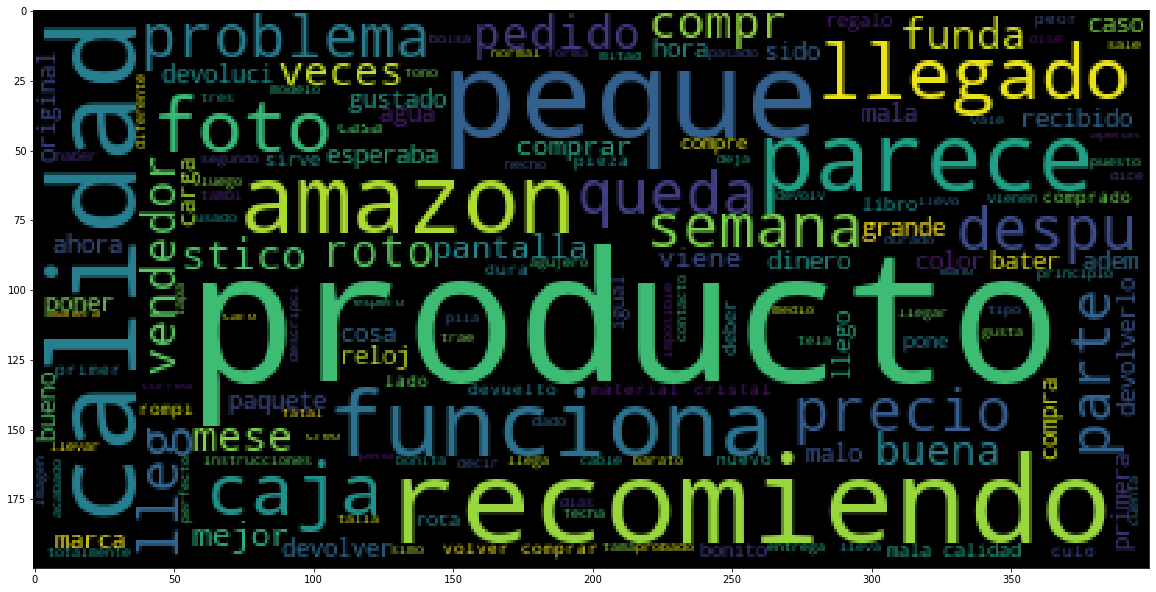

In [31]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(com_neg_list_wc))

In [32]:
review_neg_list=[]
for review in negativo.review_body:
    review = re.sub("[^a-zA-Z]"," ",str(review))
    review = review.lower()
    review = word_tokenize(review)
    review = [palabra for palabra in review if len(palabra)>3 ]
    review = [word for word in review if word not in stopwords]
    review_neg_list.append(review)

In [33]:
review_neg_w = list(itertools.chain(*review_neg_list))
review_neg_w

['malisimo',
 'grande',
 'aparatoso',
 'protector',
 'pantalla',
 'recibido',
 'pedido',
 'devoluci',
 'buscar',
 'sistema',
 'funciona',
 'abrazadera',
 'lleva',
 'agarrar',
 'manillar',
 'aprieta',
 'deslizando',
 'linterna',
 'abajo',
 'utilic',
 'brocas',
 'menor',
 'metro',
 'doblaron',
 'mantequilla',
 'nima',
 'presi',
 'dobladas',
 'enderezarlas',
 'parten',
 'exteriormente',
 'amarillas',
 'interior',
 'fundido',
 'gris',
 'peor',
 'compra',
 'hecho',
 'gusta',
 'olor',
 'viejo',
 'aspecto',
 'malo',
 'hola',
 'despu',
 'recoger',
 'paquete',
 'llegado',
 'bola',
 'rota',
 'parte',
 'elegir',
 'color',
 'envian',
 'cesto',
 'color',
 'imagino',
 'aprovechando',
 'rompiendo',
 'dicen',
 'color',
 'aleatorio',
 'foto',
 'cesta',
 'color',
 'recomiendo',
 'comprarlo',
 'pueda',
 'elegir',
 'color',
 'nico',
 'alivio',
 'romper',
 'pronto',
 'calidad',
 'baja',
 'calidad',
 'precio',
 'compra',
 'supone',
 'tirar',
 'dinero',
 'producto',
 'sale',
 'entregado',
 'recibido',
 'reco

In [34]:
#Busco la frecuencia de las palabras los comentarios negativos
from nltk.probability import FreqDist

freq_negativo = FreqDist(review_neg_w)
freq_negativo

FreqDist({'producto': 299, 'calidad': 239, 'recomiendo': 124, 'peque': 120, 'precio': 117, 'funciona': 114, 'parece': 105, 'amazon': 104, 'llegado': 102, 'comprar': 102, ...})

In [35]:
df_com_neg = pd.DataFrame(list(freq_negativo.items()), columns = ["Word", "Frequency"]  )
df_com_neg.sort_values('Frequency', ascending= False, inplace= True)
df_com_neg.reset_index(drop = True, inplace=True)
df_com_neg.head()

,Word,Frequency
0,producto,299
1,calidad,239
2,recomiendo,124
3,peque,120
4,precio,117


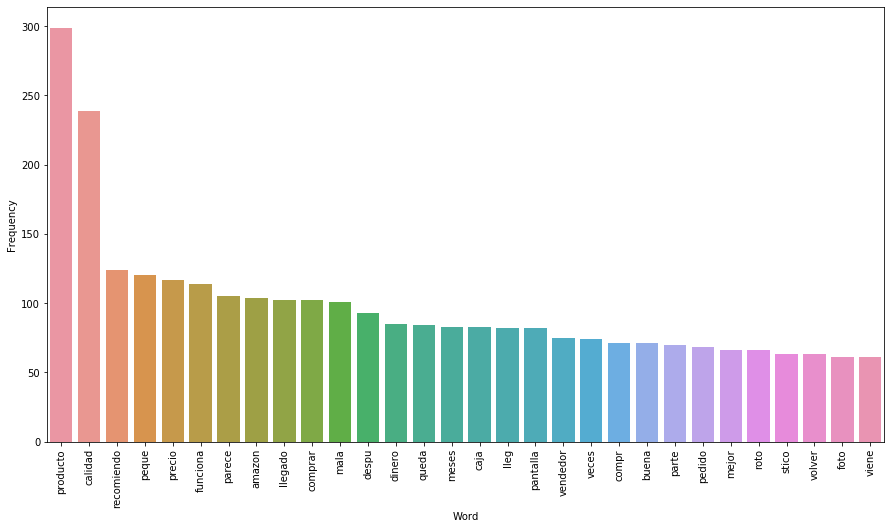

In [36]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_com_neg.iloc[:30].Word, y = df_com_neg.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### Reviews Positivas

In [37]:
# Creo dataset con comentarios positivos
positivo = data[data['stars'] >= 3]

In [38]:
# Selecciono los comentarios positivos
comentarios_positivos = positivo['review_body'].tolist()
len(comentarios_positivos)

3000

In [39]:
com_pos_list=[]
todos_comentarios_positivos = []
for com_pos in positivo.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    com_pos = re.sub("[^a-zA-Z]"," ", str(com_pos)) 
    # Pasamos todo a minúsculas
    com_pos = com_pos.lower()
    # Tokenizamos para separar las palabras
    com_pos = word_tokenize(com_pos)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    com_pos_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in com_pos]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    com_pos = [palabra for palabra in com_pos if len(palabra)>3 ]
    # Sacamos las Stopwords
    com_pos = [palabra for palabra in com_pos if not palabra in stopwords ]
    
    todos_comentarios_negativos.append(com_neg)
    
    # Por ultimo volvemos a unir el titular
    com_pos =" ".join(com_pos)
    #dataset["titular_normalizado"] = titular_list
    com_pos_list.append(com_pos)
    

In [40]:
com_pos_list_wc = " ".join(com_pos_list)

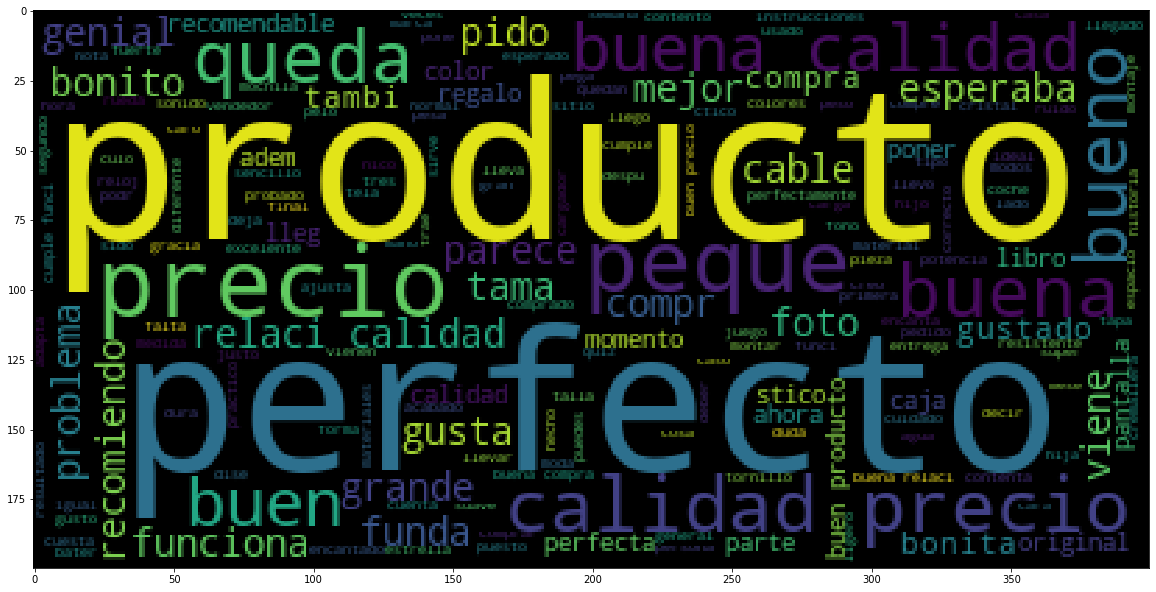

In [41]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(com_pos_list_wc))

In [42]:
review_pos_list = []
for review_pos in positivo.review_body:
    review_pos = re.sub("[^a-zA-Z]"," ",str(review_pos))
    review_pos = review_pos.lower()
    review_pos = word_tokenize(review_pos)
    review_pos = [palabra for palabra in review_pos if len(palabra)>3 ]
    review_pos = [word for word in review_pos if word not in stopwords]
    review_pos_list.append(review_pos)

In [43]:
review_pos_w = list(itertools.chain(*review_pos_list))
review_pos_w

['gusto',
 'color',
 'tejido',
 'calidad',
 'espuma',
 'recomendable',
 'llegado',
 'pido',
 'peque',
 'pensaba',
 'caben',
 'cosas',
 'foto',
 'material',
 'sico',
 'gustado',
 'producto',
 'despega',
 'pido',
 'hecho',
 'sido',
 'cocerlo',
 'parece',
 'especifico',
 'animales',
 'aprieto',
 'valer',
 'lleva',
 'basico',
 'cosita',
 'mundo',
 'precio',
 'buscas',
 'completo',
 'especifico',
 'buscas',
 'pintar',
 'casco',
 'lancha',
 'desti',
 'pintar',
 'goteaba',
 'buenos',
 'nica',
 'pega',
 'tapaderas',
 'encajan',
 'flojas',
 'quidos',
 'cuidado',
 'aceptable',
 'parte',
 'buen',
 'servicio',
 'entra',
 'caja',
 'interruptor',
 'enchufe',
 'ndar',
 'venden',
 'ferreter',
 'cumplen',
 'requisitos',
 'buscaba',
 'perfectas',
 'acompa',
 'mesa',
 'verona',
 'perfecto',
 'embalaje',
 'perfecto',
 'entregadas',
 'previsto',
 'triciclo',
 'bonito',
 'colores',
 'acertados',
 'venden',
 'cesta',
 'trasera',
 'falso',
 'necesito',
 'delantera',
 'proh',
 'guarder',
 'hijo',
 'mencionar',

In [44]:
#Busco la frecuencia de las palabras los comentarios positivos
from nltk.probability import FreqDist

freq_positivo = FreqDist(review_pos_w)
freq_positivo

FreqDist({'calidad': 549, 'precio': 466, 'buena': 390, 'producto': 306, 'buen': 258, 'peque': 212, 'perfecto': 194, 'funciona': 168, 'cumple': 154, 'compra': 153, ...})

In [45]:
df_com_pos = pd.DataFrame(list(freq_positivo.items()), columns = ["Word", "Frequency"]  )
df_com_pos.sort_values('Frequency', ascending= False, inplace= True)
df_com_pos.reset_index(drop = True, inplace=True)
df_com_pos.head()

,Word,Frequency
0,calidad,549
1,precio,466
2,buena,390
3,producto,306
4,buen,258


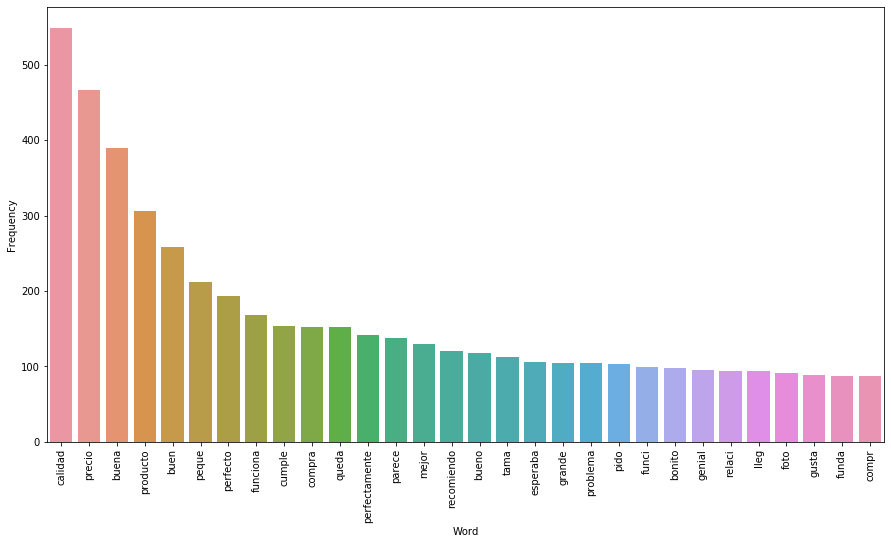

In [46]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_com_pos.iloc[:30].Word, y = df_com_pos.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### Normalización

### Stemming

In [47]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [48]:
import re
from nltk.stem import PorterStemmer

dataset = data.copy()
dataset.dropna(axis=0,inplace=True)
stemmer = PorterStemmer()

In [49]:
reviews_list=[]
for reviews in dataset.review_body:
    reviews = re.sub("[^a-zA-Z]"," ", str(reviews)) 
    reviews = reviews.lower()
    reviews = word_tokenize(reviews)
    reviews = [stemmer.stem(palabra) for palabra in reviews]
    reviews = [palabra for palabra in reviews if len(palabra)>3 ]
    reviews = [palabra for palabra in reviews if not palabra in stopwords]
    reviews = " ".join(reviews)
    reviews_list.append(reviews)

In [50]:
dataset["review_stem"] = reviews_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impec tien tama util p...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desemp funci correctament
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore vienen imagen aplastad...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda funda normalment fina colorida bo...
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,culo cumplido expectativa deseaba


### Lemmatization

In [51]:
# Importamos esta libreria que nos permite reemplzar caracteres
wordnet_lemmatizer = WordNetLemmatizer()

In [52]:
reviews_list=[]
for reviews in dataset.review_body:
    reviews = re.sub("[^a-zA-Z]"," ", str(reviews)) 
    reviews = reviews.lower()
    reviews = word_tokenize(reviews)
    review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in reviews]
    reviews = [palabra for palabra in reviews if len(palabra)>3 ]
    reviews = [palabra for palabra in reviews if not palabra in stopwords]
    reviews = " ".join(reviews)
    reviews_list.append(reviews)

In [53]:
dataset["review_lemm"] = reviews_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem,review_lemm
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impec tien tama util p...,encantado cesta llegado impecable tama util pe...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desemp funci correctament,desempe funci correctamente
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore vienen imagen aplastad...,encantado diadema flores vienen imagen aplasta...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda funda normalment fina colorida bo...,gustan fundas fundas normalmente finas colorid...
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,culo cumplido expectativa deseaba,culo cumplido expectativas deseaba


In [54]:
# Creo columna de opinion positiva(1) y negativa(0)
dataset['opinion'] = ''
# Cambio stars por 0 y 1
i = 0
while i < len(dataset):
    if dataset.stars[i] < 3:
       dataset.opinion[i] = 0
    else:
       dataset.opinion[i] = 1
    i = i +1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [55]:
dataset

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem,review_lemm,opinion
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,malisimo grand aparatoso protector pantalla,malisimo grande aparatoso protector pantalla,0
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,recibido pedido devoluci,recibido pedido devoluci,0
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,buscar sistema funciona abrazadera lleva agarr...,buscar sistema funciona abrazadera lleva agarr...,0
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,util broca menor metro doblaron varia mantequi...,utilic brocas menor metro doblaron mantequilla...,0
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,gusta olor viejo aspecto malo,gusta olor viejo aspecto malo,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impec tien tama util p...,encantado cesta llegado impecable tama util pe...,1
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desemp funci correctament,desempe funci correctamente,1
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore vienen imagen aplastad...,encantado diadema flores vienen imagen aplasta...,1
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda funda normalment fina colorida bo...,gustan fundas fundas normalmente finas colorid...,1


In [56]:
# Me quedo con el dataset con los textos y con los labels
dataset_txt = pd.concat([dataset.review_lemm, dataset.review_stem, dataset.stars, dataset.opinion], axis=1)
dataset_txt.dropna(axis=0,inplace=True)
dataset_txt.head()

,review_lemm,review_stem,stars,opinion
0,malisimo grande aparatoso protector pantalla,malisimo grand aparatoso protector pantalla,1,0
1,recibido pedido devoluci,recibido pedido devoluci,1,0
2,buscar sistema funciona abrazadera lleva agarr...,buscar sistema funciona abrazadera lleva agarr...,1,0
3,utilic brocas menor metro doblaron mantequilla...,util broca menor metro doblaron varia mantequi...,1,0
4,gusta olor viejo aspecto malo,gusta olor viejo aspecto malo,1,0


## Vectorización

In [57]:
list_reviews_lemm = list(dataset_txt['review_lemm'].values)
list_reviews_stem = list(dataset_txt['review_stem'].values)
stars = dataset_txt['stars'].values
opinion = dataset_txt['opinion'].values

### Vectorización con CountVectorizer

In [58]:
# Importo librerías para vectorizar
from sklearn.feature_extraction.text import CountVectorizer

# Voy a usar las 2000 palabras con mas frecuencia
max_features=2000
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [59]:
matriz_count_lemm = cou_vec.fit_transform(list_reviews_lemm)
matriz_count_stem = cou_vec.fit_transform(list_reviews_stem)
all_words = cou_vec.get_feature_names()

# Veo las 50 palabras mas utilizadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abren', 'abri', 'abriendo', 'abrir', 'abrirla', 'abrirlo', 'absolutament', 'absoluto', 'acab', 'acaba', 'acabado', 'acabar', 'acabo', 'acced', 'acceso', 'accesorio', 'aceit', 'acept', 'acero', 'acertado', 'acolchado', 'acompa', 'aconsej', 'aconsejo', 'acopla', 'acoplar', 'acord', 'acordado', 'actividad', 'actual', 'adapta', 'adaptador', 'adaptan', 'adecuada', 'adecuado', 'adelant', 'adem', 'adema', 'adhesivo', 'adhier', 'adir', 'adjunta', 'adorno', 'adquirir', 'adulto', 'agarr', 'agrad']


### Vectorizacion TF-DF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=max_features)

matriz_tfdf_lemm = tv.fit_transform(list_reviews_lemm)
matriz_tfdf_stem = tv.fit_transform(list_reviews_stem)

all_words_tv = tv.get_feature_names()

# Veo las 50 palabras mas utilizadas
print("50 palabras mas usadas: ",all_words[0:50])


50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abren', 'abri', 'abriendo', 'abrir', 'abrirla', 'abrirlo', 'absolutament', 'absoluto', 'acab', 'acaba', 'acabado', 'acabar', 'acabo', 'acced', 'acceso', 'accesorio', 'aceit', 'acept', 'acero', 'acertado', 'acolchado', 'acompa', 'aconsej', 'aconsejo', 'acopla', 'acoplar', 'acord', 'acordado', 'actividad', 'actual', 'adapta', 'adaptador', 'adaptan', 'adecuada', 'adecuado', 'adelant', 'adem', 'adema', 'adhesivo', 'adhier', 'adir', 'adjunta', 'adorno', 'adquirir', 'adulto', 'agarr', 'agrad']


In [61]:
print(matriz_tfdf_stem)

  (0, 1338)	0.33954364053774816
  (0, 1515)	0.39640573498656495
  (0, 117)	0.5726275179535723
  (0, 886)	0.3147665522781507
  (0, 1124)	0.5482630323935683
  (1, 550)	0.6083295362001178
  (1, 1362)	0.5320241027070317
  (1, 1598)	0.5889698884708175
  (2, 0)	0.3115366040627911
  (2, 1069)	0.39176863028375486
  (2, 1772)	0.26837154779173744
  (2, 129)	0.39974479565517
  (2, 1141)	0.42072463666679294
  (2, 1096)	0.26769516359124823
  (2, 841)	0.2023961072035447
  (2, 1768)	0.3259020070953471
  (2, 219)	0.3489940864665376
  (3, 171)	0.14842207376475222
  (3, 927)	0.21523027190131036
  (3, 357)	0.16269189635396944
  (3, 1381)	0.22468128847566368
  (3, 851)	0.30990868633475704
  (3, 1013)	0.2384055409913247
  (3, 89)	0.2914894866122218
  (3, 593)	0.2755995182331502
  :	:
  (4996, 408)	0.7563309271696348
  (4997, 817)	0.5055832398276431
  (4997, 562)	0.5055832398276431
  (4997, 1390)	0.33287725786794986
  (4997, 653)	0.3582535261480913
  (4997, 1973)	0.3538150594394316
  (4997, 964)	0.352750933

## Modelos

El modelo que voy a utilizar como benchmark va a ser DecisionTreeRegresor. La métrica que voy a utilizar para validar los diferentes modelos es accuracy. 
Esta métrica la elegí porque mide el porcentaje de casos que el modelo ha acertado. Al contar con un dataset balanceado no hay problema en utilizarla.

Para este modelo voy a empezar a utilizar como label las estrellas y compararla contra el modelo de opiniones.


### Modelo Benchmark

In [62]:
# Machine Learning DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [63]:
# Creo dataframe con la información de cada modelo 
from pandas import DataFrame
columnas = ["Modelo", "Tipo", "Libreria", "Parametros", "Vectorizador", "Texto", "Accuracy"]
grid = DataFrame(columns = columnas)
convert_column = {'Modelo': str, 
                  'Tipo': str,
                  'Libreria': str, 
                  'Parametros': str,
                  'Vectorizador': str,
                  'Texto': str,
                  "Accuracy": float
               } 
  
grid = grid.astype(convert_column) 
print(grid.dtypes)

Modelo           object
Tipo             object
Libreria         object
Parametros       object
Vectorizador     object
Texto            object
Accuracy        float64
dtype: object


### Analizo Stars vs Opinion

Verifico si existe alguna diferencia entre generar un modelo con la etiqueta de estrellas contra la etiqueta de opinion positiva y negativa.

#### Modelo con Etiqueta de Estrellas

In [64]:
# Defino los valores a probar y divido los datos en train y test
from sklearn.metrics import accuracy_score

x = matriz_count_lemm.toarray()
y = stars

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)

In [65]:
# Modelo DecisionTreeClassifier
# Modelo Benchmark con estrellas


model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_train,y_train)
pred_train = model_tree.predict(X_train)
pred_test = model_tree.predict(X_test)

In [66]:
accuracy_score(pred_train,y_train)

0.2765714285714286

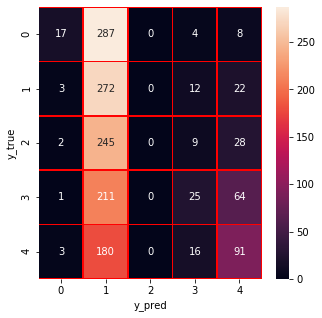

In [67]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Modelo con Etiqueta de opiniones negativas y positivas

In [68]:
# Defino los valores a probar y divido los datos en train y test
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)

In [69]:
# Modelo DecisionTreeClassifier
# Modelo Benchmark con opiniones
model_tree2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree2.fit(X_train, y_train)
pred_train = model_tree2.predict(X_train)
pred_test = model_tree2.predict(X_test)

In [70]:
acc = accuracy_score(y_test, pred_test)
acc

0.6146666666666667

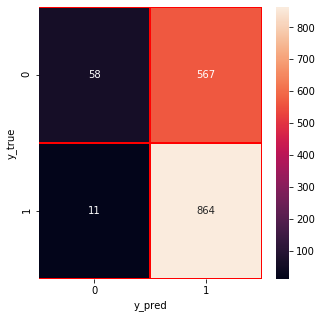

In [71]:
cm=confusion_matrix(y_test,pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Conclusion comparación modelo de estrellas vs. opiniones

Utilizando la métrica de accuracy se puede ver que el modelo con solo dos valores(positivo y negativo) es mucho mejor que el modelo que tiene las 5 estrellas.

In [72]:
# Armo grilla con el resultado del modelo
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)

Creo modelos de Benchmark de Decision Tree con Vectorizador "CountVectorizer" y "TfidfVectorizer". También verifico si existe una diferencia entre textos lematizados y steeming.

In [73]:
x = matriz_count_stem.toarray()
y = stars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)
pred_train = model_tree.predict(X_train)
pred_test = model_tree.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "CountVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)

x = matriz_tfdf_lemm.toarray()
y = stars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)
pred_train = model_tree.predict(X_train)
pred_test = model_tree.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)


x = matriz_tfdf_lemm.toarray()
y = stars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)
pred_train = model_tree.predict(X_train)
pred_test = model_tree.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "TfidfVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)

x = matriz_tfdf_stem.toarray()
y = stars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)
pred_train = model_tree.predict(X_train)
pred_test = model_tree.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "TfidfVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)

### Optimización de los hiperparámetros

Busco el mejor modelo del DecisionTreeClassifier buscando los mejores hiperparámetros.

In [74]:
model_tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

Los parametros que voy a seleccionar para buscar los mejores parámetros son:

* **splitter:** La estrategia utilizada para elegir la división en cada nodo.
* **criterion:** indica la función para medir la calidad de cada split.
* **max_depth:** profundidad de los árboles.
* **min_samples_leaf:** El número mínimo de muestras necesarias para estar en un nodo hoja.
* **max_leaf_nodes:** Se selecciona la cantidad máxima de hojas por nodo.
* **n_jobs:** número de job corriendo en simultaneo.

In [75]:
param = {'splitter': ['best', 'random'],
         'criterion': ['gini', 'entropy'],
         'max_depth': [2,4,6,8,10],
         'min_samples_leaf':np.arange(1, 10),
         'max_leaf_nodes':np.arange(1, 20)
         }

In [76]:
from sklearn.model_selection import RandomizedSearchCV
model_tree_rs = RandomizedSearchCV(model_tree, param,  n_iter=15, random_state=0, cv=5)
model_tree_rs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: F

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
               

Verifico los mejores hiperparámetros para el modelo DecisionTreeClassifier.

In [77]:
print("Mejores parametros: "+str(model_tree_rs.best_params_))
print("Mejor Score: "+str(model_tree_rs.best_score_)+'\n')

scores = pd.DataFrame(model_tree_rs.cv_results_)
scores

Mejores parametros: {'splitter': 'best', 'min_samples_leaf': 4, 'max_leaf_nodes': 11, 'max_depth': 10, 'criterion': 'entropy'}
Mejor Score: 0.28028571428571436



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.552102,0.087808,0.005871,0.003748,best,8,19,6,entropy,"{'splitter': 'best', 'min_samples_leaf': 8, 'm...",0.262857,0.242857,0.260000,0.242857,0.255714,0.252857,0.008476,7
1,0.445767,0.069868,0.003473,0.000578,random,8,12,6,entropy,"{'splitter': 'random', 'min_samples_leaf': 8, ...",0.267143,0.272857,0.284286,0.260000,0.252857,0.267429,0.010782,3
2,0.765308,0.100095,0.003358,0.000340,random,8,16,10,gini,"{'splitter': 'random', 'min_samples_leaf': 8, ...",0.270000,0.255714,0.292857,0.267143,0.284286,0.274000,0.013106,2
3,0.878728,0.113769,0.003742,0.000856,best,4,11,10,entropy,"{'splitter': 'best', 'min_samples_leaf': 4, 'm...",0.282857,0.270000,0.300000,0.262857,0.285714,0.280286,0.012917,1
4,0.465543,0.053227,0.003561,0.000729,random,4,9,6,gini,"{'splitter': 'random', 'min_samples_leaf': 4, ...",0.248571,0.235714,0.288571,0.250000,0.258571,0.256286,0.017719,5
5,0.454787,0.090945,0.003588,0.000419,random,4,5,6,gini,"{'splitter': 'random', 'min_samples_leaf': 4, ...",0.234286,0.221429,0.262857,0.247143,0.244286,0.242000,0.013780,10
6,0.181173,0.028036,0.003259,0.000518,random,2,2,2,entropy,"{'splitter': 'random', 'min_samples_leaf': 2, ...",0.212857,0.221429,0.214286,0.210000,0.224286,0.216571,0.005391,14
7,0.037837,0.004381,0.000000,0.000000,random,4,1,8,gini,"{'splitter': 'random', 'min_samples_leaf': 4, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
8,0.204478,0.069266,0.003860,0.000827,random,4,16,2,gini,"{'splitter': 'random', 'min_samples_leaf': 4, ...",0.228571,0.214286,0.225714,0.228571,0.211429,0.221714,0.007362,13
9,0.189473,0.024332,0.003493,0.000639,best,8,4,2,entropy,"{'splitter': 'best', 'min_samples_leaf': 8, 'm...",0.234286,0.238571,0.251429,0.228571,0.242857,0.239143,0.007751,11


### Mejor Modelo DecisionTreeClassifier

Corro el mejor modelo de DecisionTreeClassifier para los vectorizadores CountVectorizer y TfidfVectorizer. También controlo si mejora el modelo utilizando Stemming y Lematizado.

In [78]:
# Corro el modelo con los mejores parámetros
x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')
td_best = DecisionTreeClassifier(splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42)
td_best.fit(X_train,y_train)
pred_train = td_best.predict(X_train)
pred_test = td_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)

x = matriz_count_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
td_best = DecisionTreeClassifier(splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42)
td_best.fit(X_train,y_train)
pred_train = td_best.predict(X_train)
pred_test = td_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42",
'Vectorizador': "CountVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)

x = matriz_tfdf_lemm.toarray()
y = opiniony = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
td_best = DecisionTreeClassifier(splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42)
td_best.fit(X_train,y_train)
pred_train = td_best.predict(X_train)
pred_test = td_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42",
'Vectorizador': "TfidfVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)

x = matriz_tfdf_stem.toarray()
y = opiniony = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
td_best = DecisionTreeClassifier(splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42)
td_best.fit(X_train,y_train)
pred_train = td_best.predict(X_train)
pred_test = td_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "DecisionTreeClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "splitter = 'random', min_samples_leaf = 8, max_leaf_nodes =16, max_depth = 10, criterion = 'gini', random_state = 42",
'Vectorizador': "TfidfVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)


### Otros Modelos

Para verificar si se puede mejorar la métrica voy a utilizar tres modelos. RandomForest, SVM y Naive Bayes.

#### RandomForest

Creo modelos de Benchmark de RandomForestClassifier con Vectorizador "CountVectorizer" y "TfidfVectorizer". También verifico si existe una diferencia entre textos lematizados y steeming.

In [79]:
# importo las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')
rf = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf.fit(X_train,y_train)
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_count_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
rf.fit(X_train,y_train)
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "CountVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_lemm.toarray()
y = opiniony = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
rf.fit(X_train,y_train)
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "TfidfVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
rf.fit(X_train,y_train)
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Bechmark",
'Libreria': "nltk",
'Parametros': "max_depth=5",
'Vectorizador': "TfidfVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)

### Optimización de los hiperparámetros

Busco el mejor modelo del RandomForestClassifier buscando los mejores hiperparámetros.

In [80]:
# Veo parámetros del Random Forest
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Los parametros que voy a seleccionar para buscar los mejores parámetros son:

* **n_estimators:** número de árboles en cada bosque.
* **criterion:** métrica de error.
* **max_depth:** profundidad de los árboles.
* **min_samples_leaf:** El número mínimo de muestras necesarias para estar en un nodo hoja.
* **max_leaf_nodes:** Se selecciona la cantidad máxima de hojas por nodo.
* **n_jobs:** número de job corriendo en simultaneo.

In [81]:
param = {'n_estimators': [1, 50, 100, 150],
         'criterion': ['gini', 'entropy'],
         'max_depth': [2,4,6,8,10],
         'min_samples_leaf':np.arange(1, 10),
         'max_leaf_nodes':np.arange(1, 20),
         'n_jobs':np.arange(1, 20)}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
model_rf_rs = RandomizedSearchCV(rf, param, n_iter=10, random_state=0, verbose=1, cv=5)
model_rf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
exception calling callback for <Future at 0x7fb582b4cf50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py

exception calling callback for <Future at 0x7fb584af2050 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
Exception in thread QueueManagerThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading

exception calling callback for <Future at 0x7fb5849e2610 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5849e2110 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5849e2a10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5849e2dd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5849e2c50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846ca190 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846ca2d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846ca410 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846ca550 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846ca690 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846ca7d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846ca910 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846b4d10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846b4c10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846b4b10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846b49d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846b4890 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5846b4750 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
exception calling callback for <Future at 0x7fb5846caf50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py

exception calling callback for <Future at 0x7fb584ae3590 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

exception calling callback for <Future at 0x7fb5849a1390 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
exception calling callback for <Future at 0x7fb582cf6f50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", l

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
exception calling callback for <Future at 0x7fb58317cad0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/an

exception calling callback for <Future at 0x7fb582b67dd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reductio

exception calling callback for <Future at 0x7fb582ce9950 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb582ce0e90 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    

exception calling callback for <Future at 0x7fb582ce1390 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb583349190 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
exception calling callback for <Future at 0x7fb5849e2a90 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dis

exception calling callback for <Future at 0x7fb5831d44d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protoc

exception calling callback for <Future at 0x7fb583149d90 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
exception calling callback for <Future at 0x7fb58316dd10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anac

exception calling callback for <Future at 0x7fb582b4ce10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5831e9cd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5831e9290 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5831e9dd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5831e9c90 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5831e90d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb5831e9bd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb584af2710 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb584af2ad0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb584af2690 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7fb584af2650 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor.TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11), SIGSEGV(-11)}

  FitFailedWarning)
exception calling callback for <Future at 0x7fb5831497d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anac

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Verifico los mejores hiperparámetros para el modelo RandomForestClassifier.

In [83]:
print("Mejores parametros: "+str(model_rf_rs.best_params_))
print("Mejor Score: "+str(model_rf_rs.best_score_)+'\n')

scores = pd.DataFrame(model_rf_rs.cv_results_)
scores

Mejores parametros: {'n_jobs': 1, 'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 7, 'max_depth': 8, 'criterion': 'gini'}
Mejor Score: 0.6157142857142858



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_estimators,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.033837,0.843940,0.110482,0.003005,2,50,8,5,2,entropy,"{'n_jobs': 2, 'n_estimators': 50, 'min_samples...",0.607143,0.607143,0.607143,0.607143,0.607143,0.607143,0.000000,3
1,0.753773,0.116449,0.024437,0.017928,1,50,7,7,8,gini,"{'n_jobs': 1, 'n_estimators': 50, 'min_samples...",0.617143,0.611429,0.618571,0.618571,0.612857,0.615714,0.002997,1
2,0.897500,0.264785,0.000000,0.000000,16,100,3,6,8,gini,"{'n_jobs': 16, 'n_estimators': 100, 'min_sampl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,0.102622,0.051393,0.007300,0.002871,1,1,5,2,10,entropy,"{'n_jobs': 1, 'n_estimators': 1, 'min_samples_...",0.607143,0.608571,0.607143,0.610000,0.608571,0.608286,0.001069,2
4,0.374768,0.041019,0.000000,0.000000,7,150,1,11,8,gini,"{'n_jobs': 7, 'n_estimators': 150, 'min_sample...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,0.248410,0.051357,0.000000,0.000000,2,100,1,13,4,gini,"{'n_jobs': 2, 'n_estimators': 100, 'min_sample...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,0.374134,0.061430,0.000000,0.000000,9,50,3,8,6,entropy,"{'n_jobs': 9, 'n_estimators': 50, 'min_samples...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.512890,0.069348,0.000000,0.000000,18,100,7,10,6,entropy,"{'n_jobs': 18, 'n_estimators': 100, 'min_sampl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,0.317030,0.073260,0.000000,0.000000,4,100,4,5,8,gini,"{'n_jobs': 4, 'n_estimators': 100, 'min_sample...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.750166,0.403425,0.000000,0.000000,11,150,2,9,10,entropy,"{'n_jobs': 11, 'n_estimators': 150, 'min_sampl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


### Mejor Modelo RandomForest

Creo los mejores modelos del RandomForestClassifier con los vectorizadores "CountVectorizer" y "TfidfVectorizer". También controlo la diferencia entre textos lematizados y steeming.

In [84]:
# Corro el modelo con los mejores parámetros

x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')
rf_best = RandomForestClassifier(n_jobs = 1, n_estimators = 50, min_samples_leaf = 7, max_leaf_nodes = 7, max_depth = 8, criterion = 'gini',  random_state = 42)
rf_best.fit(X_train,y_train)
pred_train = rf_best.predict(X_train)
pred_test = rf_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "'n_jobs': 1, 'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 7, 'max_depth': 8, 'criterion': 'gini'",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_count_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf_best = RandomForestClassifier(n_jobs = 1, n_estimators = 50, min_samples_leaf = 7, max_leaf_nodes = 7, max_depth = 8, criterion = 'gini',  random_state = 42)
rf_best.fit(X_train,y_train)
pred_train = rf_best.predict(X_train)
pred_test = rf_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "'n_jobs': 1, 'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 7, 'max_depth': 8, 'criterion': 'gini'",
'Vectorizador': "CountVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_lemm.toarray()
y = opiniony = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf_best = RandomForestClassifier(n_jobs = 1, n_estimators = 50, min_samples_leaf = 7, max_leaf_nodes = 7, max_depth = 8, criterion = 'gini',  random_state = 42)
rf_best.fit(X_train,y_train)
pred_train = rf_best.predict(X_train)
pred_test = rf_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "'n_jobs': 1, 'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 7, 'max_depth': 8, 'criterion': 'gini'",
'Vectorizador': "TfidfVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
rf_best = RandomForestClassifier(n_jobs = 1, n_estimators = 50, min_samples_leaf = 7, max_leaf_nodes = 7, max_depth = 8, criterion = 'gini',  random_state = 42)
rf_best.fit(X_train,y_train)
pred_train = rf_best.predict(X_train)
pred_test = rf_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "RandomForestClassifier",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "'n_jobs': 1, 'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 7, 'max_depth': 8, 'criterion': 'gini'",
'Vectorizador': "TfidfVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)


#### Naive Bayes

Creo los modelos de Naive Bayes para los vectorizador "CountVectorizer" y "TfidfVectorizer" y los textos lematizados y steeming.

In [85]:
from sklearn.naive_bayes import GaussianNB
 
 
x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "GaussianNB",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "priors=None, var_smoothing=1e-09",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_count_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "GaussianNB",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "priors=None, var_smoothing=1e-09",
'Vectorizador': "CountVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_lemm.toarray()
y = opiniony = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "GaussianNB",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "priors=None, var_smoothing=1e-09",
'Vectorizador': "TfidfVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "GaussianNB",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "priors=None, var_smoothing=1e-09",
'Vectorizador': "TfidfVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)

### SVM

Creo modelos de Benchmark de SVM con Vectorizador "CountVectorizer" y "TfidfVectorizer". También verifico si existe una diferencia entre textos lematizados y steeming.

In [86]:
from sklearn.svm import SVC
svm = SVC(cache_size=7000)
  
x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Benchmark",
'Libreria': "nltk",
'Parametros': "C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_count_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Benchmark",
'Libreria': "nltk",
'Parametros': "C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False",
'Vectorizador': "CountVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_lemm.toarray()
y = opiniony = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Benchmark",
'Libreria': "nltk",
'Parametros': "C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False",
'Vectorizador': "TfidfVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Benchmark",
'Libreria': "nltk",
'Parametros': "C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False",
'Vectorizador': "TfidfVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)

### Optimización de los hiperparámetros

Busco los mejores hiperparámetros para SVM.

In [87]:
# Veo los parámetros del Modelo SVR
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Los parametros que voy a seleccionar para buscar los mejores parámetros son:

* **C:** Parámetro de regularización.
* **kernel:** Especifica el tipo de kernel que se utilizará en el algoritmo.
* **degred:** Grado de la función del núcleo polinomial .
* **Gamma:** Coeficiente de kernel.

In [88]:
from sklearn.model_selection import RandomizedSearchCV

param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'degree': [1, 2, 3],
         'gamma': ['scale', 'auto'],
         'C': [0.1, 0.5, 1.0],
         'cache_size' : [7000]
        }

In [89]:
model_rs = RandomizedSearchCV(svm, param, n_iter=10, random_state=0, verbose=1, cv=3)

In [90]:
model_rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 11.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=42,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'cache_size': [7000],
                                        'degree': [1, 2, 3],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
 

Aquí se pueden ver los mejores modelos de SVM.

In [91]:
print("Mejores parametros: "+str(model_rs.best_params_))
print("Mejor Score: "+str(model_rs.best_score_)+'\n')

scores = pd.DataFrame(model_rs.cv_results_)
scores

Mejores parametros: {'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 1, 'cache_size': 7000, 'C': 0.5}
Mejor Score: 0.7402832221913562



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_cache_size,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.921811,0.925357,8.013303,0.202509,rbf,scale,1,7000,0.5,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.684662,0.683805,0.683533,0.684000,0.000481,5
1,18.381862,3.418352,7.295701,0.945280,sigmoid,scale,1,7000,0.5,"{'kernel': 'sigmoid', 'gamma': 'scale', 'degre...",0.739503,0.749786,0.731561,0.740283,0.007461,1
2,13.347907,1.085949,6.046362,0.283607,linear,scale,1,7000,1.0,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.733505,0.749786,0.717839,0.733710,0.013043,4
3,19.856444,1.003986,12.091985,3.554612,rbf,auto,3,7000,0.1,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 3...",0.606684,0.607541,0.607204,0.607143,0.000352,7
4,17.120059,1.586413,7.132199,0.278396,rbf,auto,1,7000,0.5,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 1...",0.606684,0.607541,0.607204,0.607143,0.000352,7
5,12.345122,0.172604,5.842453,0.427513,sigmoid,scale,1,7000,1.0,"{'kernel': 'sigmoid', 'gamma': 'scale', 'degre...",0.739503,0.750643,0.730703,0.740283,0.008159,2
6,14.377077,1.013553,6.505855,0.056877,sigmoid,auto,1,7000,0.1,"{'kernel': 'sigmoid', 'gamma': 'auto', 'degree...",0.606684,0.607541,0.607204,0.607143,0.000352,7
7,12.326988,0.190981,5.709196,0.180940,sigmoid,scale,2,7000,1.0,"{'kernel': 'sigmoid', 'gamma': 'scale', 'degre...",0.739503,0.750643,0.730703,0.740283,0.008159,2
8,19.210811,2.838349,9.237878,2.251107,rbf,scale,2,7000,0.5,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.684662,0.683805,0.683533,0.684000,0.000481,5
9,15.485346,0.339895,6.614865,0.122347,sigmoid,auto,3,7000,1.0,"{'kernel': 'sigmoid', 'gamma': 'auto', 'degree...",0.606684,0.607541,0.607204,0.607143,0.000352,7


### Mejor Modelo SVM

Creo modelos con los hiperparámetros de SVM con Vectorizador "CountVectorizer" y "TfidfVectorizer". También verifico si existe una diferencia entre textos lematizados y steeming.

In [92]:
x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')
svm_best = SVC(C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)
svm_best.fit(X_train,y_train)
pred_train = svm_best.predict(X_train)
pred_test = svm_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)",
'Vectorizador': "CountVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_count_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
svm_best = SVC(C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)
svm_best.fit(X_train,y_train)
pred_train = svm_best.predict(X_train)
pred_test = svm_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)",
'Vectorizador': "CountVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_lemm.toarray()
y = opiniony = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
svm_best = SVC(C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)
svm_best.fit(X_train,y_train)
pred_train = svm_best.predict(X_train)
pred_test = svm_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Best Params",
'Libreria': "nltk",
'Parametros': "C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)",
'Vectorizador': "TfidfVectorizer",
'Texto': "Lematizado",
'Accuracy': round(acc,2)}, ignore_index=True)
 
x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
svm_best = SVC(C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)
svm_best.fit(X_train,y_train)
pred_train = svm_best.predict(X_train)
pred_test = svm_best.predict(X_test)
acc = accuracy_score(y_test, pred_test)
grid = grid.append({
'Modelo' : "SVM",
'Tipo': "Benchmark",
'Libreria': "nltk",
'Parametros': "C=1.0, cache_size= 7000, kernel = 'sigmoid', gamma= 'scale', degree = 1)",
'Vectorizador': "TfidfVectorizer",
'Texto': "Stemming",
'Accuracy': round(acc,2)}, ignore_index=True)

### Conclusiones

In [93]:
# Evaluo datos Grilla 
grid.sort_values('Accuracy', ascending= False, inplace= True)
grid

,Modelo,Tipo,Libreria,Parametros,Vectorizador,Texto,Accuracy
28,SVM,Benchmark,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",TfidfVectorizer,Stemming,0.75
25,SVM,Best Params,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",CountVectorizer,Lematizado,0.75
21,SVM,Benchmark,nltk,"C=1.0, break_ties=False, cache_size=200, class...",CountVectorizer,Lematizado,0.74
27,SVM,Best Params,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",TfidfVectorizer,Lematizado,0.74
26,SVM,Best Params,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",CountVectorizer,Stemming,0.74
24,SVM,Benchmark,nltk,"C=1.0, break_ties=False, cache_size=200, class...",TfidfVectorizer,Stemming,0.74
10,RandomForestClassifier,Bechmark,nltk,max_depth=5,CountVectorizer,Stemming,0.74
12,RandomForestClassifier,Bechmark,nltk,max_depth=5,TfidfVectorizer,Stemming,0.74
23,SVM,Benchmark,nltk,"C=1.0, break_ties=False, cache_size=200, class...",TfidfVectorizer,Lematizado,0.74
11,RandomForestClassifier,Bechmark,nltk,max_depth=5,TfidfVectorizer,Lematizado,0.73


De todos los modelos que fui creando los que mejores puntajes de accuracy fueron los que se obtuvieron con el SVM. El problema que surge al utilizar SVM es el costo computacional que se produce al quere correrlo. Cuando el dataset es grande suele tardar mucho tiempo y recursos en terminar de crear el modelo. Por otro lado el modelo de RandomForest ha conseguido casi el mismo porcentaje de accuracy pero es mucho más rápido al crear el modelo. 

## **Anexo I:** Librería spaCy

Verifico si mejoran las métricas utlizando la librería Spacy. Los modelos que voy a utilizar para controlar esta librería son los mejores modelos obtenidos en la sección anterior. Ellos son SVM y Random Forest.

In [107]:
!pip install -U spacy

In [108]:
# Cargo la librería de spacy
from spacy.lang.es import Spanish

ModuleNotFoundError: No module named 'spacy'

In [102]:
# Descargo el modelo en español de Spacy
!python -m spacy download es_core_news_sm

In [103]:
# Importo modelo en español de Spacy
import es_core_news_sm
nlp = es_core_news_sm.load()

ModuleNotFoundError: No module named 'es_core_news_sm'

In [ ]:
# Importo las librerias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)
print(stopwords_spacy)

['tendrá', 'haber', 'tengo', 'su', 'quizás', 'enseguida', 'adrede', 'si', 'lleva', 'parte', 'aproximadamente', 'quién', 'mias', 'sola', 'puedo', 'unas', 'va', 'mucho', 'ni', 'trabajo', 'contigo', 'ello', 'medio', 'quizá', 'últimos', 'éste', 'ellas', 'informó', 'cuenta', 'un', 'poco', 'pasada', 'tuyos', 'siendo', 'ciertos', 'usan', 'cuántas', 'ya', 'hecho', 'nosotras', 'poner', 'ser', 'existen', 'tenga', 'ver', 'tal', 'también', 'cierto', 'cuantos', 'realizado', 'ellos', 'aquellas', 'parece', 'estuvo', 'dejó', 'míos', 'ahi', 'ha', 'estaban', 'será', 'haya', 'dicen', 'varias', 'buenas', 'ustedes', 'sean', 'serán', 'ante', 'del', 'quiere', 'el', 'es', 'dan', 'pudo', 'dicho', 'por', 'aquéllos', 'debido', 'ocho', 'solamente', 'contra', 'ese', 'ningún', 'pues', 'suyo', 'mientras', 'consigue', 'dar', 'manera', 'él', 'mi', 'ambos', 'alguno', 'menos', 'expresó', 'tenía', 'aquélla', 'mismo', 'empleo', 'le', 'junto', 'yo', 'momento', 'tan', 'estos', 'despacio', 'segundo', 'cierta', 'primer', 'exp

In [ ]:
len(stopwords_spacy)

551

In [ ]:
# Tokenización
def texto_lem(oracion):
    doc = nlp(oracion)
    list_token = []
    for token in doc:
       if token.lemma != "-PRON-":
          tk = token.lemma_.strip()
       else:
          tk = token
       list_token.append(tk)

    list_token_sw = []
    for token in list_token:
       if token not in stopwords_spacy:
          list_token_sw.append(token)

    return list_token_sw

In [ ]:
# Creo el dataset
dataset_spacy = data.copy()
dataset_spacy.dropna(axis=0,inplace=True)

In [ ]:
reviews_list_lemm=[]
for reviews in dataset_spacy.review_body: 
    reviews  = texto_lem(reviews)
    reviews = " ".join(reviews) 
    reviews_list_lemm.append(reviews)

In [ ]:
dataset_spacy["review_lemm"] = reviews_list_lemm
dataset_spacy.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_lemm
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,Me encantar cesta . Ha llegar impecable . Tien...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,Desempeña función correctamente
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,Me encantar diadema ! Las flor venir imagen y ...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,"A gustar fundir TPU , fundir normalmente fino ..."
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,El artículo cumplir expectativa desear .


In [ ]:
# Creo columna de opinion positiva(1) y negativa(0)
dataset_spacy['opinion'] = ''

In [ ]:
# Cambio stars por 0 y 1
i = 0
while i < len(dataset_spacy): 
  if dataset_spacy.stars[i] < 3: 
    dataset_spacy.opinion[i] = 0 
  else: 
    dataset_spacy.opinion[i] = 1 
  i = i + 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Dataset con texto lematizado
dataset_spacy

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_lemm,opinion
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,"Malisimo , grande demasiar aparatoso y protect...",0
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,No recibir pedir devolución,0
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,"Tengo buscar sistema , funcionar . La abrazade...",0
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,Utilicé broca menor diámetro y doblar comer ma...,0
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,No gustar olor a viejo y aspecto malo,0
...,...,...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,Me encantar cesta . Ha llegar impecable . Tien...,1
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,Desempeña función correctamente,1
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,Me encantar diadema ! Las flor venir imagen y ...,1
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,"A gustar fundir TPU , fundir normalmente fino ...",1


In [ ]:
# Me quedo con el dataset lematizado y con los labels
dataset_lemm = pd.concat([dataset_spacy.review_lemm, dataset_spacy.stars, dataset_spacy.opinion], axis=1)
dataset_lemm.dropna(axis=0,inplace=True)
dataset_lemm.head()

,review_lemm,stars,opinion
0,"Malisimo , grande demasiar aparatoso y protect...",1,0
1,No recibir pedir devolución,1,0
2,"Tengo buscar sistema , funcionar . La abrazade...",1,0
3,Utilicé broca menor diámetro y doblar comer ma...,1,0
4,No gustar olor a viejo y aspecto malo,1,0


In [ ]:
# Vectoriación
list_reviews = list(dataset_lemm['review_lemm'].values)
stars = dataset_lemm['stars'].values
opinion = dataset_lemm['opinion'].values

In [ ]:
# Importo librerías para vectorizar
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Voy a usar las 2000 palabras con mas frecuencia
max_features=2000
cou_vec=CountVectorizer(max_features=max_features) 

matriz_reviews = cou_vec.fit_transform(list_reviews)
all_words = cou_vec.get_feature_names()

TfidfVectorizer

sklearn.feature_extraction.text.TfidfVectorizer

In [ ]:
# Veo las 50 palabras mas utilizadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['10', '100', '11', '12', '13', '15', '150', '16', '20', '200', '2018', '2019', '24', '25', '30', '300', '3d', '40', '50', '500', '60', '70', '90', 'abajar', 'abonar', 'abrigar', 'abrir', 'abrirla', 'abrirlo', 'absolutamente', 'absoluto', 'abultar', 'acabar', 'acabo', 'acceso', 'accesorio', 'aceitar', 'aceptable', 'acertar', 'acolchar', 'acompañar', 'aconsejar', 'aconsejo', 'acoplar', 'acordar', 'acorde', 'acostumbrar', 'actividad', 'activo', 'actual']


## Random Forest Classifier

In [ ]:
# importo las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

x = matriz_reviews.toarray()
y = opinion
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)

In [ ]:
# Modelo RandomForestClassifier
tree_spacy = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
tree_spacy.fit(X_train,y_train)
pred_train = tree_spacy.predict(X_train)
pred_test = tree_spacy.predict(X_test)
acc = accuracy_score(y_test, pred_test)

In [ ]:
# Armo grilla con el resultado del modelo
grid = grid.append({
    'Modelo' : "RandomForestClassifier",
    'Tipo': "Best Params",
    'Libreria': 'spaCy',
    'Parametros': "n_jobs=-1, oob_score = True, random_state = 42",
    'Vectorizador': "TfidfVectorizer",
    'Texto': "Lematizado",
    'Accuracy': round(acc,2)}, ignore_index=True)

## SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(cache_size=7000)
x = matriz_reviews.toarray()
y = opinion
y = y.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)
acc = accuracy_score(y_test, pred_test)

In [ ]:
# Armo grilla con el resultado del modelo
grid = grid.append({
    'Modelo' : "SVM",
    'Tipo': "Benchmark",
    'Libreria': 'spaCy',
    'Parametros': "C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False",
    'Vectorizador': "TfidfVectorizer",
    'Texto': "Lematizado",
    'Accuracy': round(acc,2)}, ignore_index=True)

### Conclusiones

A continuación se pueden ver los resultados que surgieron de utilizar la librería Spacy. El mejor modelo obtenido fue con el modelo de SVM. Al compararlo con lka librería NLTK se puede observar que el resultado de la librería Spacy fue menor.

In [ ]:
# Evaluo todos los modelos  
grid.sort_values('Accuracy', ascending= False, inplace= True)
grid

,Modelo,Tipo,Libreria,Parametros,Accuracy,Texto,Vectorizador
0,SVM,Benchmark,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",0.75,Stemming,TfidfVectorizer
1,SVM,Best Params,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",0.75,Lematizado,CountVectorizer
6,RandomForestClassifier,Bechmark,nltk,max_depth=5,0.74,Stemming,CountVectorizer
9,SVM,Benchmark,nltk,"C=1.0, break_ties=False, cache_size=200, class...",0.74,Lematizado,TfidfVectorizer
8,SVM,Benchmark,nltk,"C=1.0, break_ties=False, cache_size=200, class...",0.74,Stemming,TfidfVectorizer
7,RandomForestClassifier,Bechmark,nltk,max_depth=5,0.74,Stemming,TfidfVectorizer
29,SVM,Benchmark,spaCy,"C=1.0, break_ties=False, cache_size=200, class...",0.74,Lematizado,TfidfVectorizer
5,RandomForestClassifier,Bechmark,nltk,max_depth=5,0.74,Lematizado,CountVectorizer
4,SVM,Best Params,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",0.74,Stemming,CountVectorizer
3,SVM,Best Params,nltk,"C=1.0, cache_size= 7000, kernel = 'sigmoid', g...",0.74,Lematizado,TfidfVectorizer


## **Anexo II:** Dataset Completo

En este apartado voy a utilizar un dataset más grande para verificar si mejora la métrica del accuracy.

In [ ]:
#Cargo datos desde Drive
data = pd.read_json("/content/drive/MyDrive/Personal/Cursos/Acamica/Proyecto 3/dataset_es_train.json", lines = True)
data.head()

In [ ]:
#Cargo datos desde archivo
#data = pd.read_json("dataset_es_dev.json", lines = True)
#dataset.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


### Analizo los datos

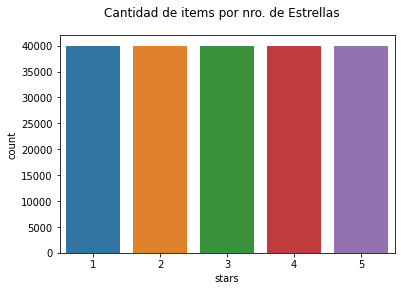

In [ ]:
#Cantidad de review por estrellas
sns.countplot(x="stars", data=data)
plt.suptitle('Cantidad de items por nro. de Estrellas')
plt.show()

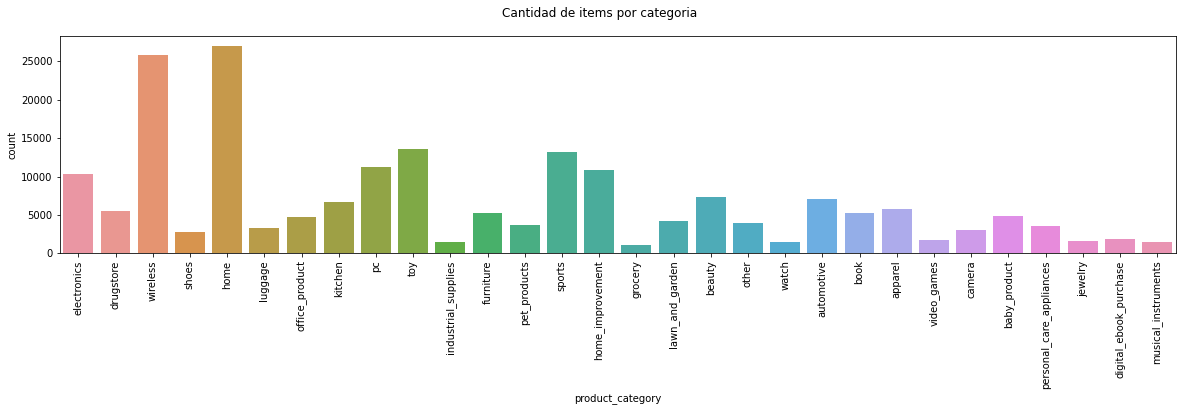

In [ ]:
#Cantidad de productos por categoría
plt.figure(figsize = (20,4))
plt.suptitle('Cantidad de items por categoria')
sns.countplot(x="product_category", data=data)
plt.xticks(rotation=90)
plt.show()


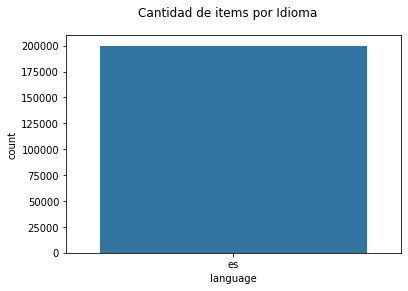

In [ ]:
#Idioma de los comentarios del dataset
sns.countplot(x="language", data=data)
plt.suptitle('Cantidad de items por Idioma')
plt.show()


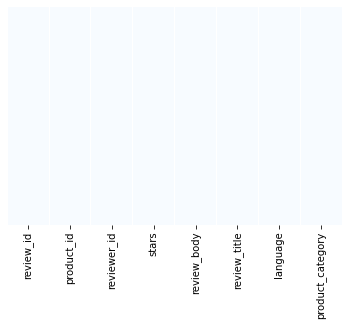

In [ ]:
#Controlo datos faltantes
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [ ]:
dataset = data.copy()
dataset.dropna(axis=0,inplace=True)
stemmer = PorterStemmer()

In [ ]:
reviews_list=[]
for reviews in dataset.review_body:
   reviews = re.sub("[^a-zA-Z]"," ", str(reviews))
   reviews = reviews.lower()
   reviews = word_tokenize(reviews)
   reviews = [stemmer.stem(palabra) for palabra in reviews]
   reviews = [palabra for palabra in reviews if len(palabra)>3 ]
   reviews = [palabra for palabra in reviews if not palabra in stopwords]
   reviews = " ".join(reviews)
   reviews_list.append(reviews)

In [ ]:
dataset["review_stem"] = reviews_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics,mando funciona perfectament cumpl funcion orig...
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics,compr bater reticencia result instalar destorn...
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel,buena calidad satisfecha compra
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy,perfecto cumpl hijo
199999,es_0859809,product_es_0378794,reviewer_es_0141717,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,es,home,brocha buena meno pelito quiz pesan chula igual


In [ ]:
# Creo columna de opinion positiva(1) y negativa(0)
dataset['opinion'] = ''
# Cambio stars por 0 y 1
i = 0
while i < len(dataset):
    if dataset.stars[i] < 3:
       dataset.opinion[i] = 0
    else:
       dataset.opinion[i] = 1
    i = i +1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
list_reviews_stem = list(dataset['review_stem'].values)
stars = dataset['stars'].values
opinion = dataset['opinion'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features=2000
 
tv = TfidfVectorizer(max_features=max_features) 
matriz_tfdf_stem = tv.fit_transform(list_reviews_stem)
all_words_tv = tv.get_feature_names()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)

In [ ]:
tree = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
tree.fit(X_train,y_train)
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_test)
acc

0.77785

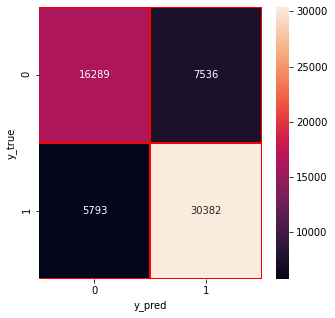

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Conclusiones

Al utilizar un dataset más grande se puede observar que la métrica de accuracy ha aumentado en comparación con los resultados anteriores. 

## **Anexo III:** Validaciones Varias

En este apartado voy a realizar varias pruebas para verificar si el uso stopwords o si la cantidad de letras por palabras mejoran el modelo.

In [ ]:
#data = pd.read_json("/content/drive/MyDrive/Personal/Cursos/Acamica/Proyecto 3/dataset_es_dev.json", lines = True)
#data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel


In [ ]:
#Cargo datos desde archivo
data = pd.read_json("dataset_es_dev.json", lines = True)
data.head()

In [ ]:
dataset = data.copy()
dataset.dropna(axis=0,inplace=True)
stemmer = PorterStemmer()

In [ ]:
reviews_list=[]
for reviews in dataset.review_body:
   reviews = re.sub("[^a-zA-Z]"," ", str(reviews))
   reviews = reviews.lower()
   reviews = word_tokenize(reviews)
   reviews = [stemmer.stem(palabra) for palabra in reviews]
   reviews = [palabra for palabra in reviews if len(palabra)>3 ]
   reviews = [palabra for palabra in reviews if not palabra in stopwords]
   reviews = " ".join(reviews)
   reviews_list.append(reviews)

In [ ]:
dataset["review_stem"] = reviews_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado cesta llegado impec tien tama util p...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,desemp funci correctament
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema flore vienen imagen aplastad...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,gustan funda funda normalment fina colorida bo...
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,culo cumplido expectativa deseaba


In [ ]:
# Creo columna de opinion positiva(1) y negativa(0)
dataset['opinion'] = ''
# Cambio stars por 0 y 1
i = 0
while i < len(dataset):
    if dataset.stars[i] < 3:
       dataset.opinion[i] = 0
    else:
       dataset.opinion[i] = 1
    i = i +1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
list_reviews_stem = list(dataset['review_stem'].values)
stars = dataset['stars'].values
opinion = dataset['opinion'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features=10000 
tv = TfidfVectorizer(max_features=max_features) 
matriz_tfdf_stem = tv.fit_transform(list_reviews_stem)
all_words_tv = tv.get_feature_names()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)

In [ ]:
tree = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
tree.fit(X_train,y_train)
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_test)
acc

0.726

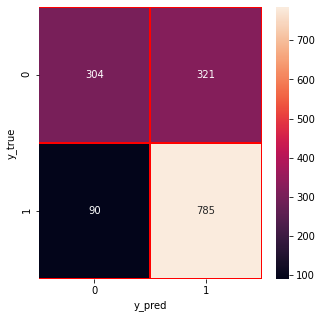

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
reviews_list=[]
for reviews in dataset.review_body:
   reviews = re.sub("[^a-zA-Z]"," ", str(reviews))
   reviews = reviews.lower()
   reviews = word_tokenize(reviews)
   reviews = [stemmer.stem(palabra) for palabra in reviews]
   reviews = [palabra for palabra in reviews if not palabra in stopwords] # Quitar para que no se valide las stopwords
   reviews = [palabra for palabra in reviews if len(palabra)>6 ] # Modificar la cantidad de letras por palabras
   reviews = " ".join(reviews)
   reviews_list.append(reviews)

In [ ]:
dataset["review_stem"] = reviews_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem,opinion,review_new
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,encantado llegado realment preciosa cualquier,1,me ha encantado la cesta ha llegado impecable ...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,correctament,1,desempe a su funci n correctamente
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,encantado diadema aplastada perfecta,1,me ha encantado la diadema las flores son tal ...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,normalment colorida alucinado cambiando,1,a mi me gustan mucho las fundas tpu ya que son...
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,cumplido expectativa deseaba,1,el art culo ha cumplido con las expectativas q...


In [ ]:
# Creo columna de opinion positiva(1) y negativa(0)
dataset['opinion'] = ''
# Cambio stars por 0 y 1
i = 0
while i < len(dataset):
    if dataset.stars[i] < 3:
       dataset.opinion[i] = 0
    else:
       dataset.opinion[i] = 1
    i = i +1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
list_reviews_stem = list(dataset['review_stem'].values)
stars = dataset['stars'].values
opinion = dataset['opinion'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features=10000 
tv = TfidfVectorizer(max_features=max_features) 
matriz_tfdf_stem = tv.fit_transform(list_reviews_stem)
all_words_tv = tv.get_feature_names()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = matriz_tfdf_stem.toarray()
y = opinion
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)

In [ ]:
tree = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42)
tree.fit(X_train,y_train)
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_test)
acc

0.6813333333333333

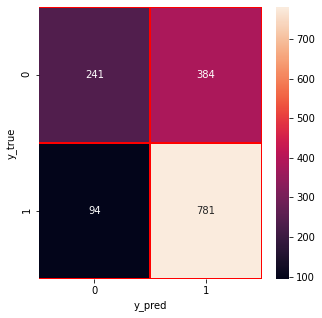

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Conclusiones

Intenté mejorar el modelo para ello realicé algunas validaciones extras para ver si mejoraba el resultado de la métrica accuracy.
A continuación detallo los resultados obteniendos.

Diferencia entre modelo con stopwords vs sin stopwords(accuracy):
* Sin stopwords:  0.751
* Con stopwords:  0.736

Diferencia entre modelo con stopwords, pero con restricción de cantidad de letras por palabras(accuracy) :
* Palabras con más de 3 letras:  0.726
* Palabras con más de 6 letras:: 0.667

Diferencia entre modelo sin stopwords, pero con restricción de cantidad de letras por palabras(accuracy) :
* Palabras con más de 3 letras:  0.742
* Palabras con más de 6 letras:  0.681

Diferencia entre modelo con 2000 features vs 5000 features(accuracy) :
* Modelo con 2000 Features:  0.741
* Modelo con 5000 Features:  0.621


## Anexo IV Predicción

¿Qué información está usando el modelo para predecir?

Para identificar cuales son las palabras que más utiliza el modelo voy a utilizar la librería eli5. Ésta librería nos indica que cual es el peso que tiene cada palabra en el modelo.

In [34]:
!pip install eli5

In [115]:
from sklearn.ensemble import RandomForestClassifier
list_reviews_stem = list(dataset['review_stem'].values)
stars = dataset['stars'].values
opinion = dataset['opinion'].values

x = matriz_count_lemm.toarray()
y = opinion
y = y.astype('int')


tf_idf = TfidfVectorizer(stop_words=stopwords, max_features=2000)
rf = RandomForestClassifier(n_jobs=-1, oob_score = True, random_state = 42, n_estimators=200 )

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)


matriz_tfdf_stem= tf_idf.fit_transform(list_reviews_stem)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [116]:
tf_idf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [81]:
# Verifico los features de la vectorización
tf_idf.get_feature_names()

['abajo',
 'abierta',
 'abierto',
 'abonaron',
 'abren',
 'abrir',
 'abrirla',
 'abrirlo',
 'acaba',
 'acabado',
 'acabar',
 'acabo',
 'acceso',
 'accesorio',
 'aceit',
 'acept',
 'acerca',
 'acero',
 'acertado',
 'acolchada',
 'acolchado',
 'acompa',
 'aconsej',
 'aconsejo',
 'acopl',
 'acopla',
 'acoplar',
 'acord',
 'acordado',
 'actividad',
 'actual',
 'adapt',
 'adapta',
 'adaptador',
 'adaptan',
 'adecuada',
 'adecuadament',
 'adecuado',
 'adelant',
 'adem',
 'adema',
 'adhesivo',
 'adhier',
 'adido',
 'adir',
 'admit',
 'adquirir',
 'adulto',
 'agarr',
 'agrad',
 'agradec',
 'agua',
 'aguant',
 'aguanta',
 'aguantan',
 'aguantar',
 'agudo',
 'aguja',
 'agujero',
 'ahora',
 'ahorra',
 'ahorro',
 'ajust',
 'ajusta',
 'ajustada',
 'ajustado',
 'ajustan',
 'ajustar',
 'ajustarlo',
 'alarma',
 'alcanc',
 'aleman',
 'alexa',
 'algod',
 'alguien',
 'algun',
 'alimentaci',
 'almacenamiento',
 'almacenar',
 'almohada',
 'almohadilla',
 'alrededor',
 'alta',
 'altavoc',
 'altavoz',
 'alte

In [125]:
# Muestro el peso de las palabras
import eli5
from eli5.sklearn import PermutationImportance
fn= tf_idf.get_feature_names()
eli5.show_weights(rf, top=100, feature_names = list(fn))

Weight,Feature
0.0146 ± 0.0118,boquilla
0.0126 ± 0.0134,bord
0.0106 ± 0.0110,prevista
0.0096 ± 0.0107,mandaron
0.0095 ± 0.0073,pidament
0.0093 ± 0.0120,alternativa
0.0076 ± 0.0076,desperfecto
0.0074 ± 0.0095,diciembr
0.0072 ± 0.0072,sabor
0.0067 ± 0.0069,recuperar


## Preguntas

#### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?

**Rta:** Como lo mostré anteriormente el modelo binario, es decir, con las etiquetas de  opinión positiva y negativa, funciona mucho mejor que el modelo de estrellas.

2. ¿Hay algo que te gustaría investigar o probar?

**Rta:** En los anexos del proyecto he investigado sobre como afecta al accuracy las diferentes variables. Probé con y sin stopwords y como afecta las palabras de más de 3 o 6 letras.

Algo que me gustaría investigar es si alguna palabra dentro de las stopwords mejoran o empeoran el modelo.

Para el próximo trabajo voy a trabajar con redes neuronales para ver si su utilización hace que aumente la métricas obtenidas con el mejor modelo de este proyecto. 